In [1]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['FangSong']
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import denoise_wavelet
"""
关于scikit-image的denoise_wavelet注释:
    ```
    The wavelet domain is a sparse representation of the image, and can be
    thought of similarly to the frequency domain of the Fourier transform.
    Sparse representations have most values zero or near-zero and truly random
    noise is (usually) represented by many small values in the wavelet domain.
    Setting all values below some threshold to 0 reduces the noise in the
    image, but larger thresholds also decrease the detail present in the image.

    If the input is 3D, this function performs wavelet denoising on each color
    plane separately. The output image is clipped between either [-1, 1] and
    [0, 1] depending on the input image range.

    When YCbCr conversion is done, every color channel is scaled between 0
    and 1, and `sigma` values are applied to these scaled color channels.
    ```
"""
from skimage import color, data, img_as_float
import pywt
from playground import gaussian_noise, poisson_noise  # 复用`空间滤波`问题里的代码



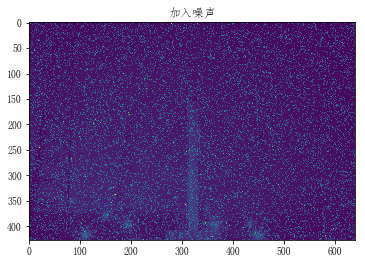

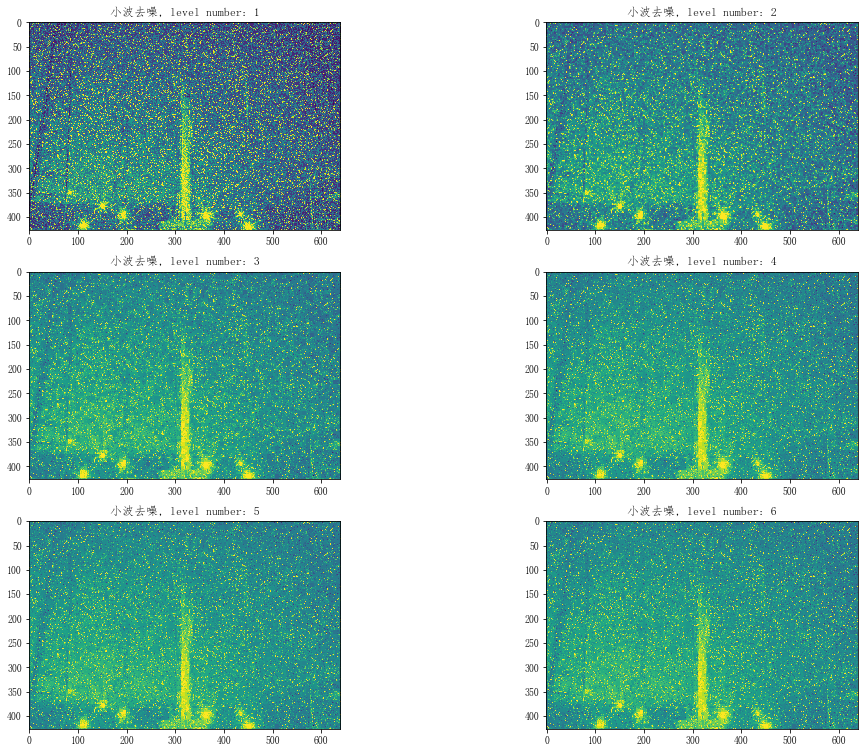

In [2]:
img  = img_as_float(color.rgb2gray(data.rocket()))
noised_img = gaussian_noise(poisson_noise(img))
plt.imshow(noised_img)
plt.title('加入噪声')
plt.show()

fig = plt.gcf()
fig.set_size_inches(17, 13)

for level_num in range(1, 7):
    denoised_img = denoise_wavelet(noised_img, sigma=0.37, wavelet_levels=level_num)  # 使用多level
    plt.subplot(3, 2, level_num)
    plt.imshow(denoised_img)
    plt.title(f'小波去噪, level number: {level_num}')
plt.show()